# Kidney

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import sys
from importlib import reload


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from utils import CancerType

## Iteration 1, individual subgroups

In [2]:
kidney = CancerType('Kidney')

In [4]:
kidney.countSubtypes()

[['82900' 17]
 ['83103' 930]
 ['83123' 323]
 ['83173' 15]
 ['C64' 73]]


```
8290/0: Oxyphilic adenoma
8310/3: Clear cell adenocarcinoma, NOS
8312/3: Renal cell carcinoma, NOS 
8317/3: Renal cell carcinoma, chromophobe type
```

In [3]:
code_remap = {
'82900': 'Oxyphilic adenoma',
'83103': 'Clear cell adenocarcinoma',
'83123': 'Renal cell carcinoma',
'83173': 'Renal cell carcinoma chromophobe type',
'C64': 'Not Specified'
}

In [4]:
kidney.relabel(code_remap)

In [5]:
kidney.countSubtypes()

[['Clear cell adenocarcinoma' 930]
 ['Not Specified' 73]
 ['Oxyphilic adenoma' 17]
 ['Renal cell carcinoma' 323]
 ['Renal cell carcinoma chromophobe type' 15]]


In [6]:
kidney.dumpSubtypeCounts()

PCA done! Time elapsed: 0.1694951057434082 seconds
Cumulative explained variation for 50 principal components: 0.9417236529034672
t-SNE done! Time elapsed: 10.726088047027588 seconds


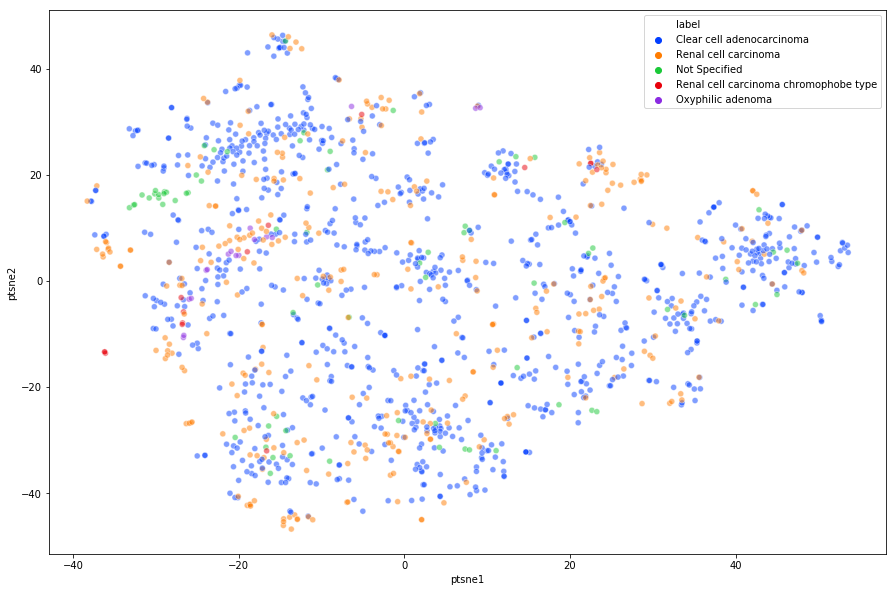

In [8]:
kidney.pcaTSNE()

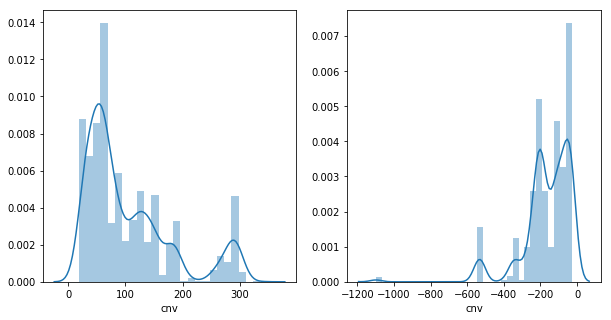

In [9]:
kidney.groupData()

In [10]:
kidney.analyze([230, 120, -700, -450])
kidney.dumpFiles()

In [11]:
kidney.countData()

amp_genes	(757, 9)
del_genes	(40, 9)
genes	757
high_amp_genes	(245, 9)
low_amp_genes	(512, 9)
high_del_genes	(3, 9)
low_del_genes	(37, 9)
high_amp_census	(8, 9)
low_amp_census	(18, 9)
amp_census	(26, 9)
high_del_census	(0, 9)
low_del_census	(3, 9)
del_census	(3, 9)
census	29


### Oxyphilic adenoma: 8290/0

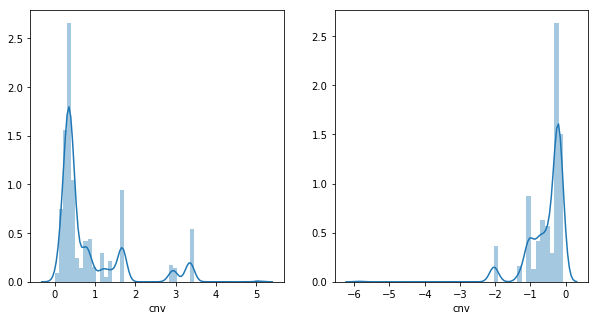

In [12]:
subtype = 'Oxyphilic adenoma'
kidney.prepareSubtype(subtype)

In [21]:
kidney.analyzeSubtype(subtype,[2.5,1, -1.5,-1])
kidney.dumpSubtypeFiles(subtype)

### Clear cell adenocarcinoma: 8310/3

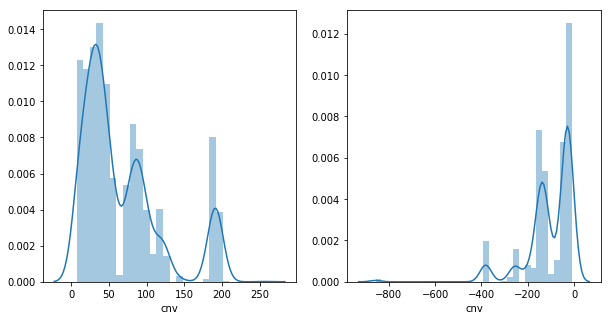

In [14]:
subtype = 'Clear cell adenocarcinoma'
kidney.prepareSubtype(subtype)

In [16]:
kidney.analyzeSubtype(subtype,[160,60, -500,-220])
kidney.dumpSubtypeFiles(subtype)

### Renal cell carcinoma: 8312/3

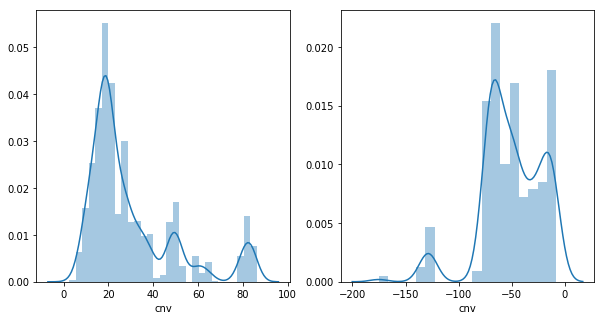

In [17]:
subtype = 'Renal cell carcinoma'
kidney.prepareSubtype(subtype)

In [18]:
kidney.analyzeSubtype(subtype,[70,40, -150,-100])
kidney.dumpSubtypeFiles(subtype)

### Renal cell carcinoma chromophobe type: 8317/3

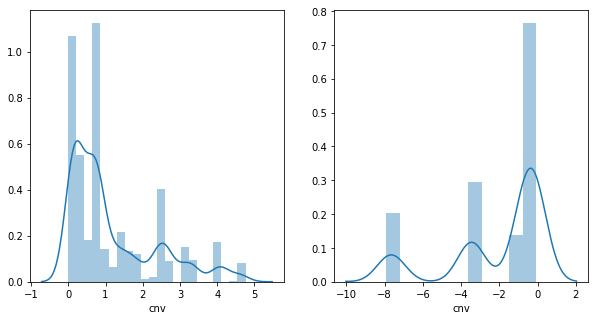

In [19]:
subtype = 'Renal cell carcinoma chromophobe type'
kidney.prepareSubtype(subtype)

In [20]:
kidney.analyzeSubtype(subtype,[3.5,2, -6,-2])
kidney.dumpSubtypeFiles(subtype)

### Conclusion

"Clear cell adenocarcinoma" and "Renal cell carcinoma" have very similar signature, need additional test. No merging for now